# training using SVM and random forest algorithms

## SVM training and evaluation
## kernel:linear

In [4]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump

# Load the training and validation datasets
train_data = pd.read_csv('train_data.csv')  # Replace with your train data file path
val_data = pd.read_csv('val_data.csv')  # Replace with your validation data file path

# Separate features and labels for training data
X_train = train_data.drop(columns='label')  # Features from training data
y_train = train_data['label']  # Labels from training data

# Separate features and labels for validation data
X_val = val_data.drop(columns='label')  # Features from validation data
y_val = val_data['label']  # Labels from validation data

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_val_scaled = scaler.transform(X_val)  # Transform validation data

# Train the SVM model
model = SVC(kernel='linear', random_state=42)  # You can try other kernels like 'rbf'
model.fit(X_train_scaled, y_train)

# Save the trained model and scaler
dump(model, 'svm_model.joblib')  # Save the SVM model
dump(scaler, 'scaler.joblib')  # Save the scaler

# Evaluate the model on the validation data
y_pred = model.predict(X_val_scaled)

# Display the evaluation metrics
print("Accuracy on Validation Data: {:.2f}%".format((y_pred == y_val).mean() * 100))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Accuracy on Validation Data: 99.09%

Classification Report:
              precision    recall  f1-score   support

      Bengin       1.00      0.92      0.96        24
   Malignant       1.00      1.00      1.00       113
      Normal       0.98      1.00      0.99        83

    accuracy                           0.99       220
   macro avg       0.99      0.97      0.98       220
weighted avg       0.99      0.99      0.99       220


Confusion Matrix:
[[ 22   0   2]
 [  0 113   0]
 [  0   0  83]]


# training and evaluation using kernel:rbf

In [5]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from joblib import dump

# Load the training and validation datasets
train_data = pd.read_csv('train_data.csv')  # Replace with your train data file path
val_data = pd.read_csv('val_data.csv')  # Replace with your validation data file path

# Separate features and labels for training data
X_train = train_data.drop(columns='label')  # Features from training data
y_train = train_data['label']  # Labels from training data

# Separate features and labels for validation data
X_val = val_data.drop(columns='label')  # Features from validation data
y_val = val_data['label']  # Labels from validation data

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_val_scaled = scaler.transform(X_val)  # Transform validation data

# Train the SVM model
model = SVC(kernel='rbf', random_state=42)  # You can try other kernels like 'rbf'
model.fit(X_train_scaled, y_train)



# Evaluate the model on the validation data
y_pred = model.predict(X_val_scaled)

# Display the evaluation metrics
print("Accuracy on Validation Data: {:.2f}%".format((y_pred == y_val).mean() * 100))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val, y_pred))


Accuracy on Validation Data: 98.64%

Classification Report:
              precision    recall  f1-score   support

      Bengin       1.00      0.88      0.93        24
   Malignant       1.00      1.00      1.00       113
      Normal       0.97      1.00      0.98        83

    accuracy                           0.99       220
   macro avg       0.99      0.96      0.97       220
weighted avg       0.99      0.99      0.99       220


Confusion Matrix:
[[ 21   0   3]
 [  0 113   0]
 [  0   0  83]]


## cross validation

In [6]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Load your train_data CSV
train_data = pd.read_csv('train_data.csv')  # Make sure to replace the path

# Shuffle data to avoid any ordering bias
train_data = shuffle(train_data, random_state=42)

# Split the data into features (X) and labels (y)
X_train = train_data.drop(columns=['label'])  # Drop the 'label' column to get the features
y_train = train_data['label']  # 'label' column is your target variable

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the SVM model (you can modify the kernel and hyperparameters)
svm_model = SVC(C=1, kernel='linear', gamma='scale')  # Example hyperparameters

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-validation scores for each fold:", cv_scores)

# Print the average accuracy across all folds
print("Average accuracy:", cv_scores.mean())


Cross-validation scores for each fold: [0.98051948 0.98701299 0.97385621 0.98039216 0.96078431]
Average accuracy: 0.9765130294542059


# random forest algorithm

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming 'train_data' and 'validate_data' are your training and validation datasets
# Make sure your train_data and validate_data contain both features and labels

# Define the features (X) and labels (y) for training and validation
X_train = train_data.drop('label', axis=1)  # Excluding label column from features
y_train = train_data['label']  # Label column

X_val = val_data.drop('label', axis=1)
y_val = val_data['label']

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_val)

# Evaluate the model
print("Random Forest Model Evaluation")
print(f"Accuracy: {accuracy_score(y_val, y_pred_rf) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_val, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_rf))


Random Forest Model Evaluation
Accuracy: 94.55%
Classification Report:
              precision    recall  f1-score   support

      Bengin       1.00      0.58      0.74        24
   Malignant       0.97      1.00      0.98       113
      Normal       0.91      0.98      0.94        83

    accuracy                           0.95       220
   macro avg       0.96      0.85      0.89       220
weighted avg       0.95      0.95      0.94       220

Confusion Matrix:
[[ 14   2   8]
 [  0 113   0]
 [  0   2  81]]


# K-Nearest Neighbors (KNN) Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predictions
y_pred_knn = knn_model.predict(X_val)

# Evaluate the model
print("KNN Model Evaluation")
print(f"Accuracy: {accuracy_score(y_val, y_pred_knn) * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_val, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred_knn))


KNN Model Evaluation
Accuracy: 96.36%
Classification Report:
              precision    recall  f1-score   support

      Bengin       0.95      0.83      0.89        24
   Malignant       0.99      0.97      0.98       113
      Normal       0.93      0.99      0.96        83

    accuracy                           0.96       220
   macro avg       0.96      0.93      0.94       220
weighted avg       0.96      0.96      0.96       220

Confusion Matrix:
[[ 20   1   3]
 [  0 110   3]
 [  1   0  82]]


# visualization 
## confusion matrix of svm

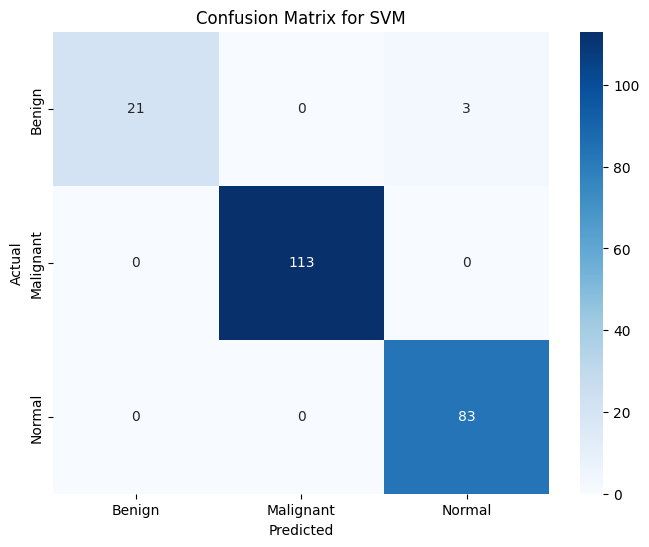

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# For SVM 
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()


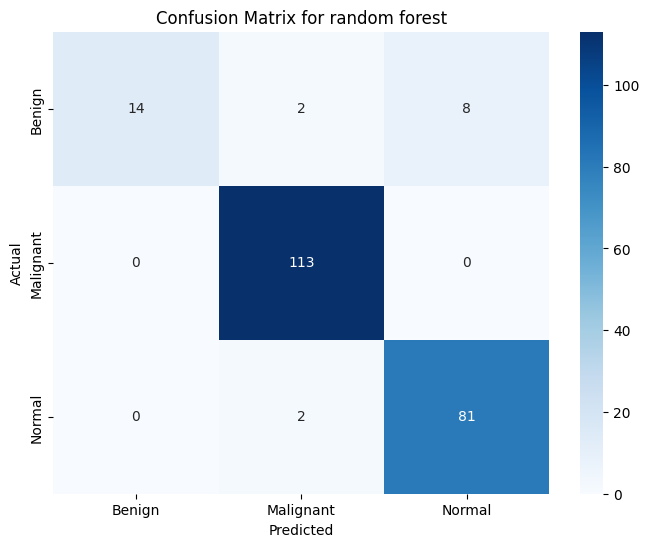

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix



# For SVM 
cm = confusion_matrix(y_val, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Malignant', 'Normal'], yticklabels=['Benign', 'Malignant', 'Normal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for random forest')
plt.show()


## cross validation scores of SVM

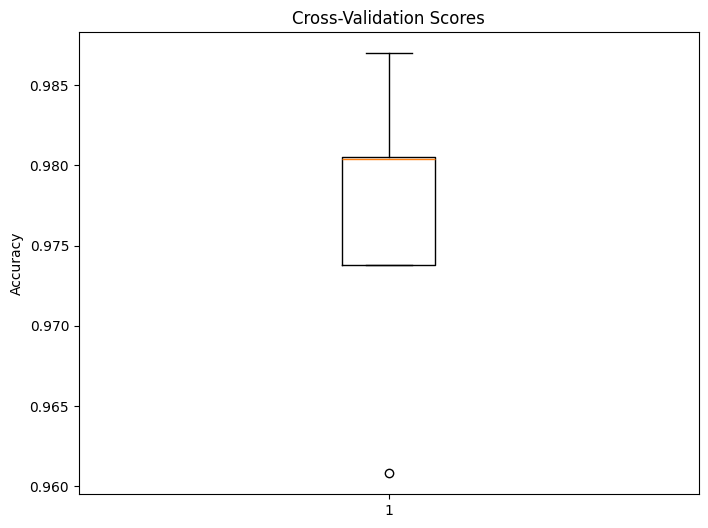

In [15]:
# Assuming you have cross-validation scores stored in a variable `cv_scores`
cv_scores = [0.9805, 0.9870, 0.9738, 0.9804, 0.9608]  # Example, replace with your scores

# Plot cross-validation scores
plt.figure(figsize=(8, 6))
plt.boxplot(cv_scores)
plt.title('Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.show()


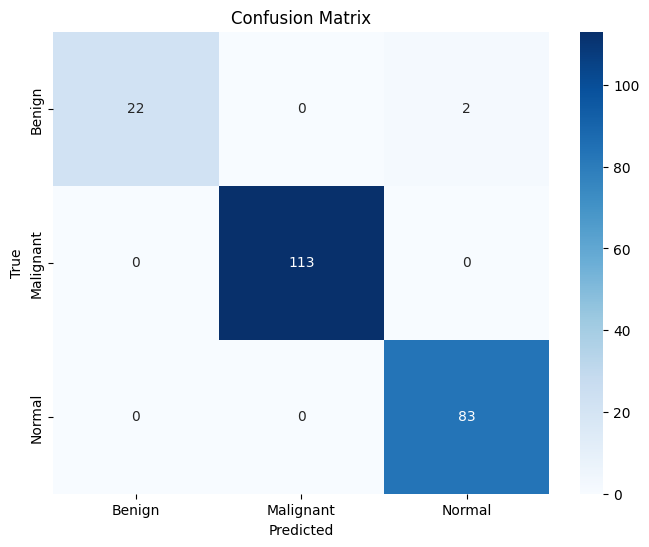

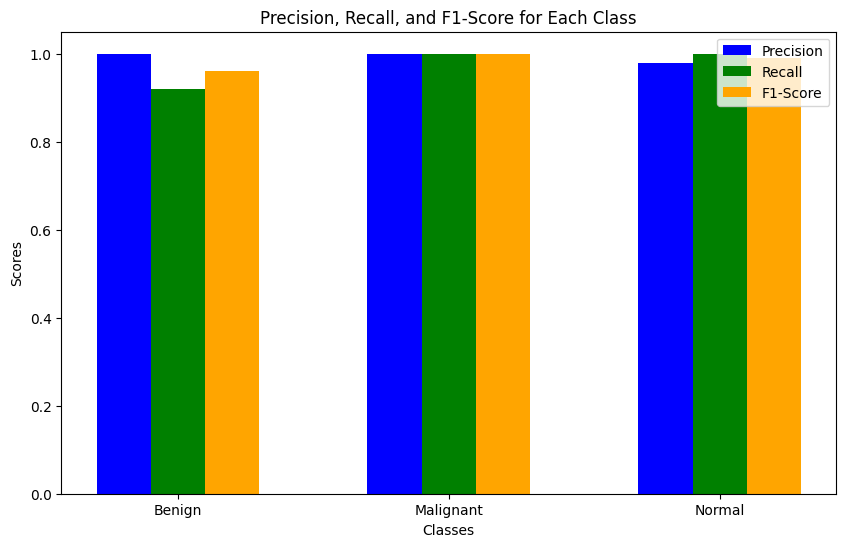

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Example data from classification report
precision = [1.00, 1.00, 0.98]
recall = [0.92, 1.00, 1.00]
f1_score = [0.96, 1.00, 0.99]
classes = ['Benign', 'Malignant', 'Normal']

# Example confusion matrix
cm = np.array([[22, 0, 2],
               [0, 113, 0],
               [0, 0, 83]])

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Precision, Recall, F1-Score Bar Chart
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for precision, recall, and f1 score
x = np.arange(len(classes))
width = 0.2

ax.bar(x - width, precision, width, label='Precision', color='blue')
ax.bar(x, recall, width, label='Recall', color='green')
ax.bar(x + width, f1_score, width, label='F1-Score', color='orange')

# Labeling the graph
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score for Each Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

plt.show()


## comparing between algorithms performance

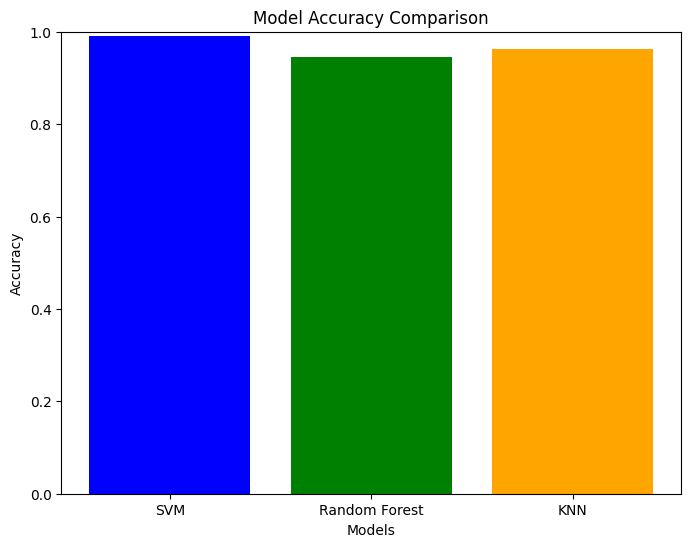

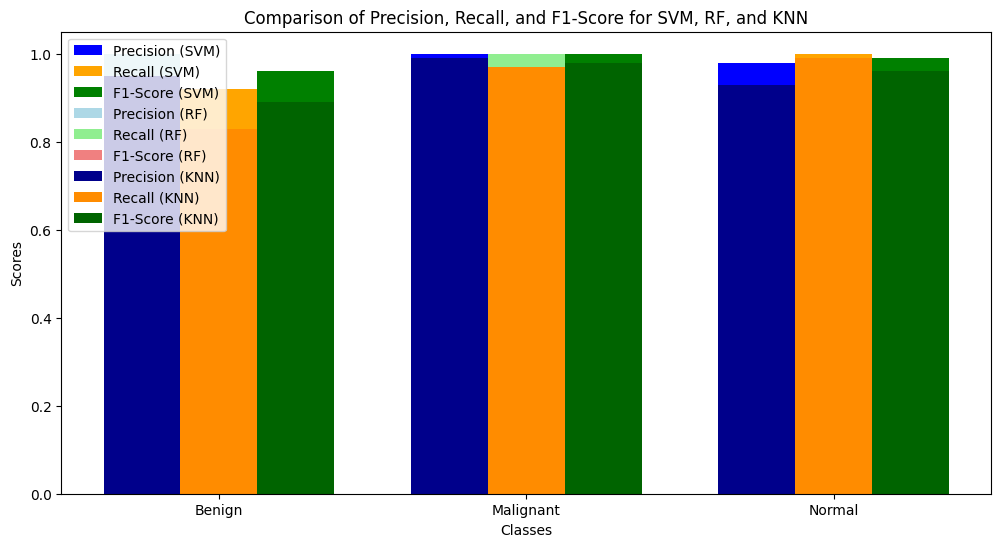

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
import numpy as np

# Example classification results for SVM, Random Forest, KNN (Modify with actual results)
# You can replace these with the actual output of your models
models = ['SVM', 'Random Forest', 'KNN']

# Accuracy
accuracies = [0.9909, 0.9455, 0.9636]

# Precision, Recall, F1-Score for each class (e.g., Benign, Malignant, Normal)
# For illustration, these values are randomly assigned; use the actual classification report results.
precision_svm = [1.00, 1.00, 0.98]
recall_svm = [0.92, 1.00, 1.00]
f1_svm = [0.96, 1.00, 0.99]
         


precision_rf = [1.00, 0.97, 0.91]
recall_rf = [0.58, 1.00, 0.98]
f1_rf = [0.74, 0.98, 0.94]

precision_knn = [0.95, 0.99, 0.93]
recall_knn = [0.83, 0.97, 0.99]
f1_knn = [0.89, 0.98, 0.96]

# Plotting Accuracy
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plotting Precision, Recall, and F1 Score
labels = ['Benign', 'Malignant', 'Normal']

fig, ax = plt.subplots(figsize=(12, 6))

# Precision, Recall, F1 Score
width = 0.25  # Width of the bars
x = np.arange(len(labels))

# Bar chart for Precision, Recall, F1 Score
ax.bar(x - width, precision_svm, width, label='Precision (SVM)', color='blue')
ax.bar(x, recall_svm, width, label='Recall (SVM)', color='orange')
ax.bar(x + width, f1_svm, width, label='F1-Score (SVM)', color='green')

ax.bar(x - width, precision_rf, width, label='Precision (RF)', color='lightblue')
ax.bar(x, recall_rf, width, label='Recall (RF)', color='lightgreen')
ax.bar(x + width, f1_rf, width, label='F1-Score (RF)', color='lightcoral')

ax.bar(x - width, precision_knn, width, label='Precision (KNN)', color='darkblue')
ax.bar(x, recall_knn, width, label='Recall (KNN)', color='darkorange')
ax.bar(x + width, f1_knn, width, label='F1-Score (KNN)', color='darkgreen')

# Labeling the chart
ax.set_xlabel('Classes')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Precision, Recall, and F1-Score for SVM, RF, and KNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
